<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="./media/niag.png"></a>

# River incision

As a first example, we will apply the advection equation to simulate the evolution of Niagara falls after the retreat of the laurentide ice-sheet. Note that general-style knickpoint retreat is well casted with an advection equation but that specific processes causing waterfalls to retreat (such as plunge pool erosion) are not represented. If you want to learn more on the Niagara escarpment, check out [this webinar](https://www.youtube.com/watch?v=Az7utk0h3Ek). 

## Simulation is approximation 
Every model makes some simplifications. That's what we will do here. 
Create a fluvial profile with a length of 15000m (15 km). All elevations can be set to 75m exept the last cell, which is the baselevel at the escarpment and can be set at 0m. Plot the shape of the initial river profile and the knickpoint.

Now assume you are right after the retreate of the Laurentide ice sheet 10000 years ago. Advance the knickpoint in time using the numerical advection scheme as developed in the [advection notebook](advection.ipynb). You can assume an average wave speed, or knickpoint retreat rate, of 1m/year and run the solution for 10000 years. The right boundary condition can be set and fixed to zero throughout the run. Note that the incision wave is running from right to left. What sign is the velocity?
Finally compare the numerical solution with the analytical one. What do you see and why is there a difference? 
* Develop a function to calculate the advection speed (call it e.g. 'advection_solver')

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def advection_solver(T_num,v,dt,dx,run_duration):
    iter = 0
    #Numerical solution 
    while iter * dt < run_duration:
        iter += 1
        if v > 0:
            T_num[1:] -= v * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[0] = 0
        elif v < 0:
            T_num[:-1] -= v * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[-1] = 0
    return T_num

151


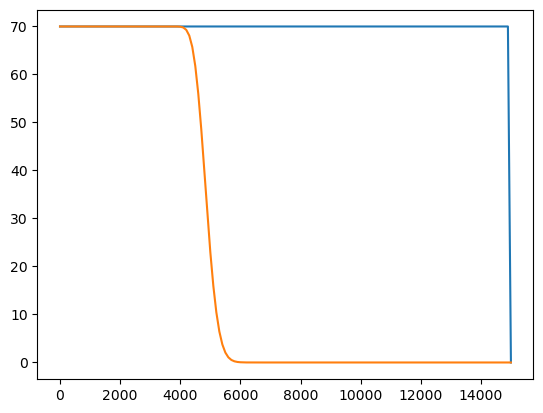

In [6]:
nb_cells = 151
L = 15000
x=np.linspace(0,15000,nb_cells)
z=np.ones(nb_cells)*70
z[-1]= 0
plt.plot(x,z)
print(len(x))
v = -1
dt = 90
dx = L / (nb_cells-1)
run_duration = 10000
z_num = advection_solver(z,v,dt,dx,run_duration)
plt.plot(x,z_num)

What happens if we incease the timestep to 200 year? Describe what is going on and explain the mathematical formula we can use to controll for this kind of irregularities. 